In [0]:
from tensorflow import keras
import tensorflow as tf

from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pylab as plt
import numpy as np

from google.colab import drive
import os

from keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
if os.path.exists('/content/gdrive/')==False:
  drive.mount('/content/gdrive')
  print('Google drive is mounted\n')
else:
  print('Google drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google drive is mounted



- 예측한 이미지로부터의 라벨을 받기 위해서 작성
- 파일의 경로를 따라 바로 클래스명과 이미지로 딕션을 만들어주는 편리함때문에 이미지 데이터는 불필요하지만 그대로 사용함

In [0]:
val_datagen = ImageDataGenerator(rescale=1/255)

In [0]:
val_path = '/content/gdrive/My Drive/food_test/val_set' #수정해야할 부분 ~ 라벨링 부분


val_dir = str(val_path)

In [0]:
image_size = 224

val_batchsize = 10


validation_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(image_size,image_size),
                                                    batch_size=val_batchsize,
                                                    shuffle=True)

Found 9367 images belonging to 93 classes.


In [0]:
#학습된 모델 로드
model2 = keras.models.load_model('/content/gdrive/My Drive/save_file/densenet2.h5')


W0623 08:06:02.453730 139986903947136 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


메추리알장조림


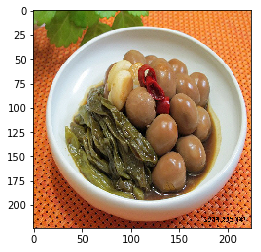

In [0]:
#분류할 이미지의 경로
image = '/content/gdrive/My Drive/food_test/val_set/메추리알장조림/Img_112_0016.jpg'   #입력할 이미지 경로


#이미지를 모델이 예측 가능하도록 가공
x = keras.preprocessing.image.load_img(image, target_size=(224,224))

x1 = keras.preprocessing.image.img_to_array(x)

x = np.expand_dims(x1, axis=0)

#예측
result = model2.predict(x)

#목록 클래스 라벨화 후 정렬
label_names = sorted(validation_generator.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

#결과값을 음식으로 맵핑시켜 초기화
result_label = label_names[np.argmax(result)]

print(result_labels)

result_img = keras.preprocessing.image.array_to_img(x1)

plt.imshow(result_img)